# 304 Save and Reload

"""
View more, visit my tutorial page: https://mofanpy.com/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
* torch: 0.1.11
* matplotlib

In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)    # reproducible

### Generate some fake data

In [2]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)


In [3]:
def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()
    epochs = 100

    for t in range(epochs):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(8, 8))
    plt.subplot(221)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters
    
    # can also save other information in a checkpoint - if continuing training
    checkpoint = {'optimizer': optimizer,
                  'optimizer state dict': optimizer.state_dict(),
                  'network' : net1,
                  'network state dict': net1.state_dict(),
                  'epochs': epochs,
                  'loss function': loss_func}
    torch.save(checkpoint, 'checkpoint.pth')

In [4]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(222)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)


In [5]:
def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

    # plot result
    plt.subplot(223)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [6]:
def restore_all():
    # load in all network information and training info 
    checkpoint = torch.load('checkpoint.pth')
    
    #restore network info
    net4 = checkpoint['network']
    net4.load_state_dict(checkpoint['network state dict'])
    
    #load in optimizer info
    optimizer = checkpoint['optimizer']
    optimizer.load_state_dict(checkpoint['optimizer state dict'])
    
    #load in epochs
    epochs = checkpoint['epochs']
    
    #load in loss function
    loss_func = checkpoint['loss function']
    
    max_epochs = 150
    
    for t in range(epochs, max_epochs):
        prediction = net4(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    

    prediction = net4(x)

    # plot result
    plt.subplot(224)
    plt.title('Net4')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

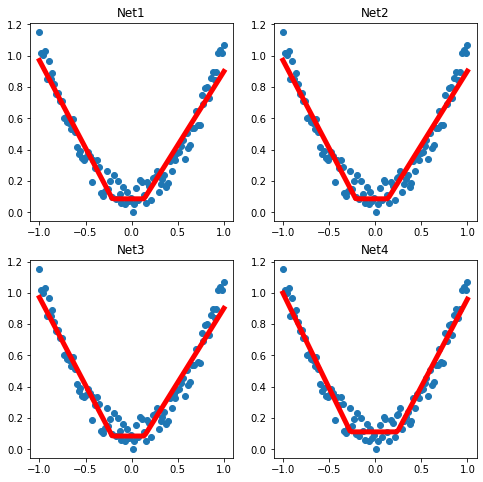

In [8]:
# save net1
save()
# restore entire net (may slow)
restore_net()
# restore only the net parameters
restore_params()
#restore all training info and train more
restore_all()